In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from   scipy import stats
import statsmodels.formula.api as sm
import os

In [ ]:
from google.colab import drive
import os
drive.mount("/content/gdrive")
%cd "/content/gdrive/MyDrive/Proyecto_DJIA"
df= pd.read_csv("DOW30.csv")
df.set_index("Date", inplace=True)
df.index = pd.to_datetime(df.index)

Mounted at /content/gdrive
/content/gdrive/MyDrive/Proyecto_DJIA


In [ ]:
df.drop(["LABEL", "Open", "High", "Low"], axis=1, inplace=True)
df.columns = df.columns.str.replace('Close', 'DJIA')

In [ ]:
pip install --upgrade yfinance

In [ ]:
import yfinance as yf
tickers_list = ["AAPL", "AMGN","AXP", "BA", "CAT", "CRM", "CSCO", "CVX", "DIS", "GS", "HD", "HON", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "NKE", "PG", "TRV", "UNH", "V", "VZ", "WBA", "WMT"]
data = yf.download(tickers_list, start='2008-04-01', end='2018-03-30' )['Close']

[*********************100%***********************]  29 of 29 completed


In [ ]:
Data_frame = pd.concat([df, data], axis=1)

In [ ]:
pip install missingno

<Axes: >

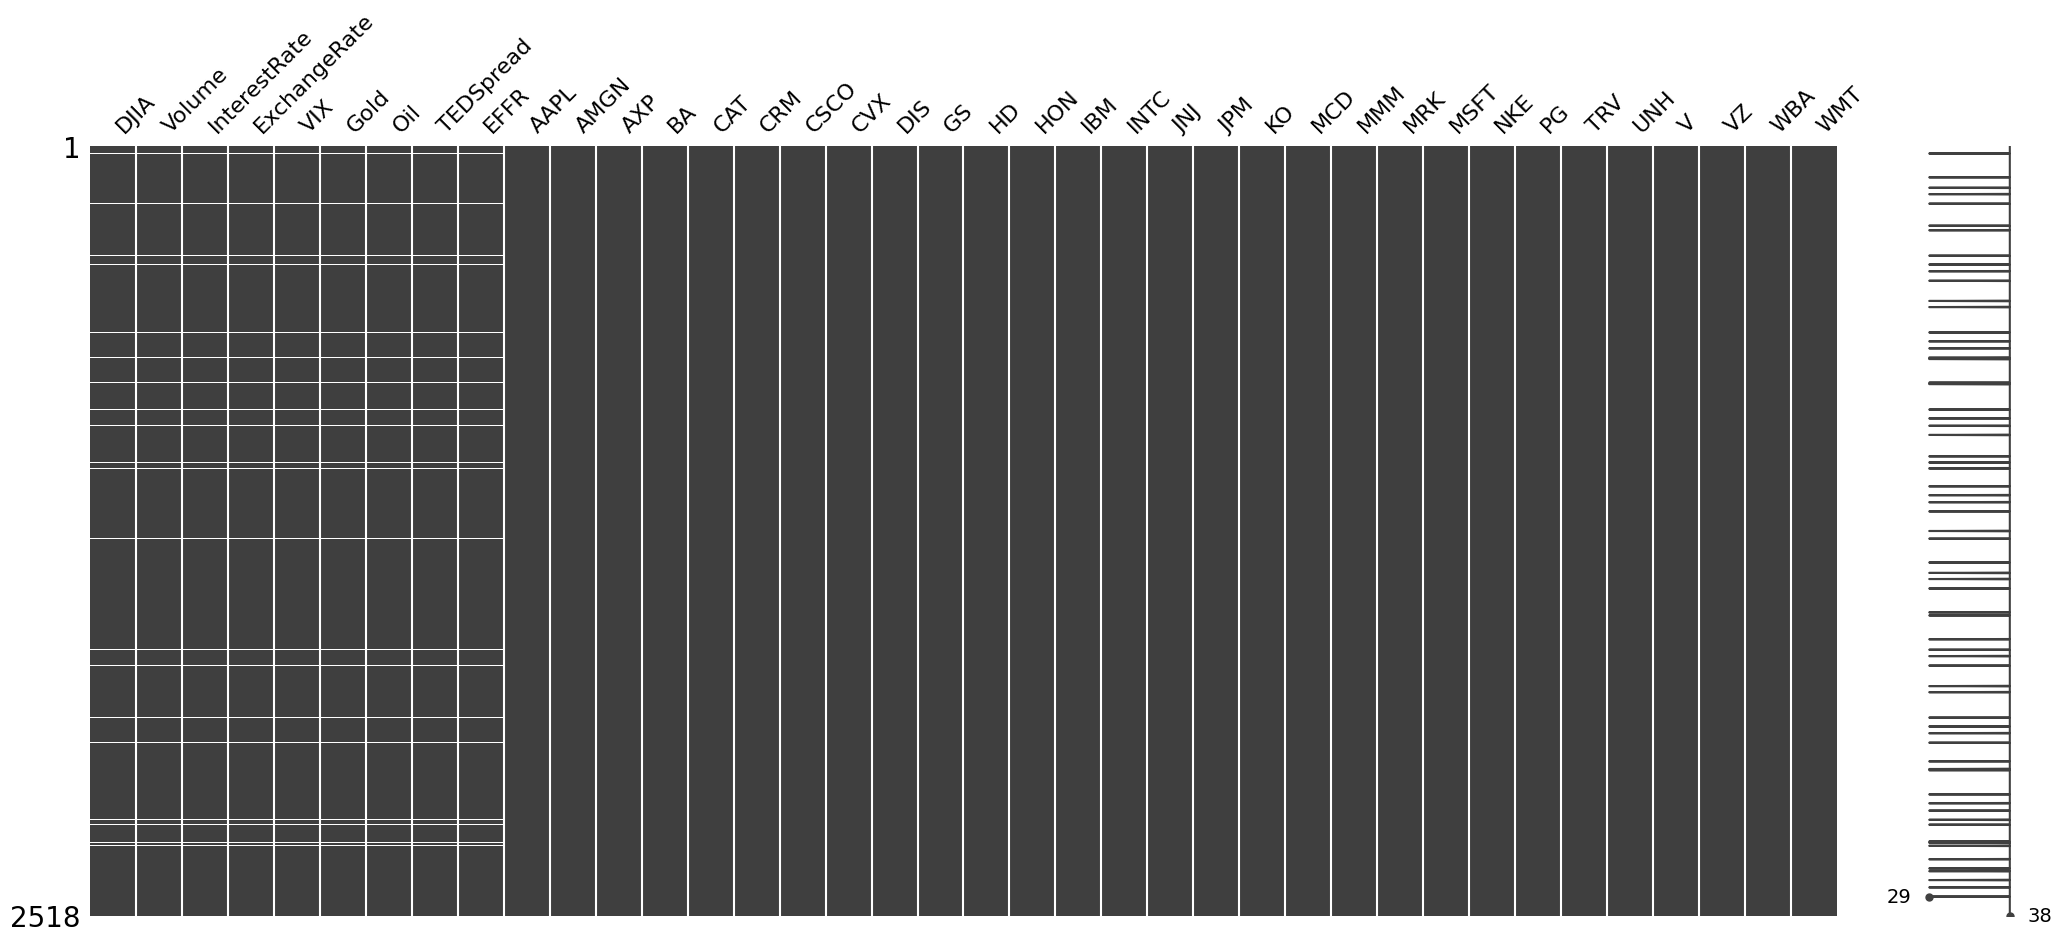

In [ ]:
import missingno as msno
msno.matrix(Data_frame)

In [ ]:
Data_frame["DJIA"] = Data_frame.DJIA.interpolate(method="linear")
Data_frame["Volume"] = Data_frame.Volume.interpolate(method="linear")
Data_frame["InterestRate"] = Data_frame.InterestRate.interpolate(method="linear")
Data_frame["ExchangeRate"] = Data_frame.ExchangeRate.interpolate(method="linear")
Data_frame["VIX"] = Data_frame.VIX.interpolate(method="linear")
Data_frame["Gold"] = Data_frame.Gold.interpolate(method="linear")
Data_frame["Oil"] = Data_frame.Oil.interpolate(method="linear")
Data_frame["EFFR"] = Data_frame.EFFR.interpolate(method="linear")
Data_frame['TEDSpread'] = Data_frame.TEDSpread.interpolate(method="linear")

In [ ]:
Data_frame.columns

Index(['DJIA', 'Volume', 'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil',
       'TEDSpread', 'EFFR', 'AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO',
       'CVX', 'DIS', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
       'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ',
       'WBA', 'WMT'],
      dtype='object')

<Axes: >

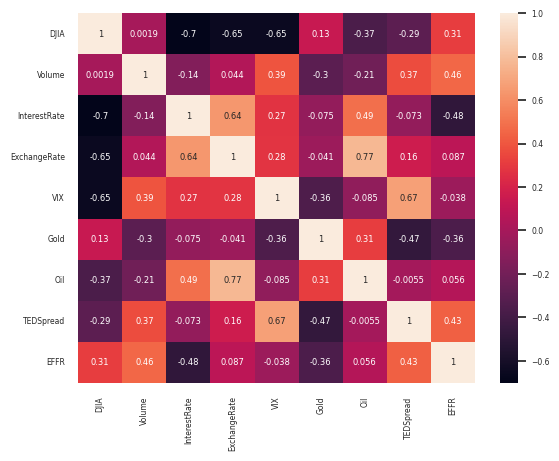

In [ ]:
cols = ['DJIA', 'Volume', 'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil','TEDSpread',
       'EFFR']
cm1 = np.corrcoef(Data_frame[cols].values.T)
sns.set(font_scale=0.5)
sns.heatmap(cm1, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

In [ ]:
model = 'DJIA~InterestRate + VIX + ExchangeRate + EFFR + Volume'
lm    = sm.ols(formula = model, data = Data_frame).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   DJIA   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     1997.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:14:16   Log-Likelihood:                -22573.
No. Observations:                2518   AIC:                         4.516e+04
Df Residuals:                    2512   BIC:                         4.519e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.628e+04    458.778     79.073   

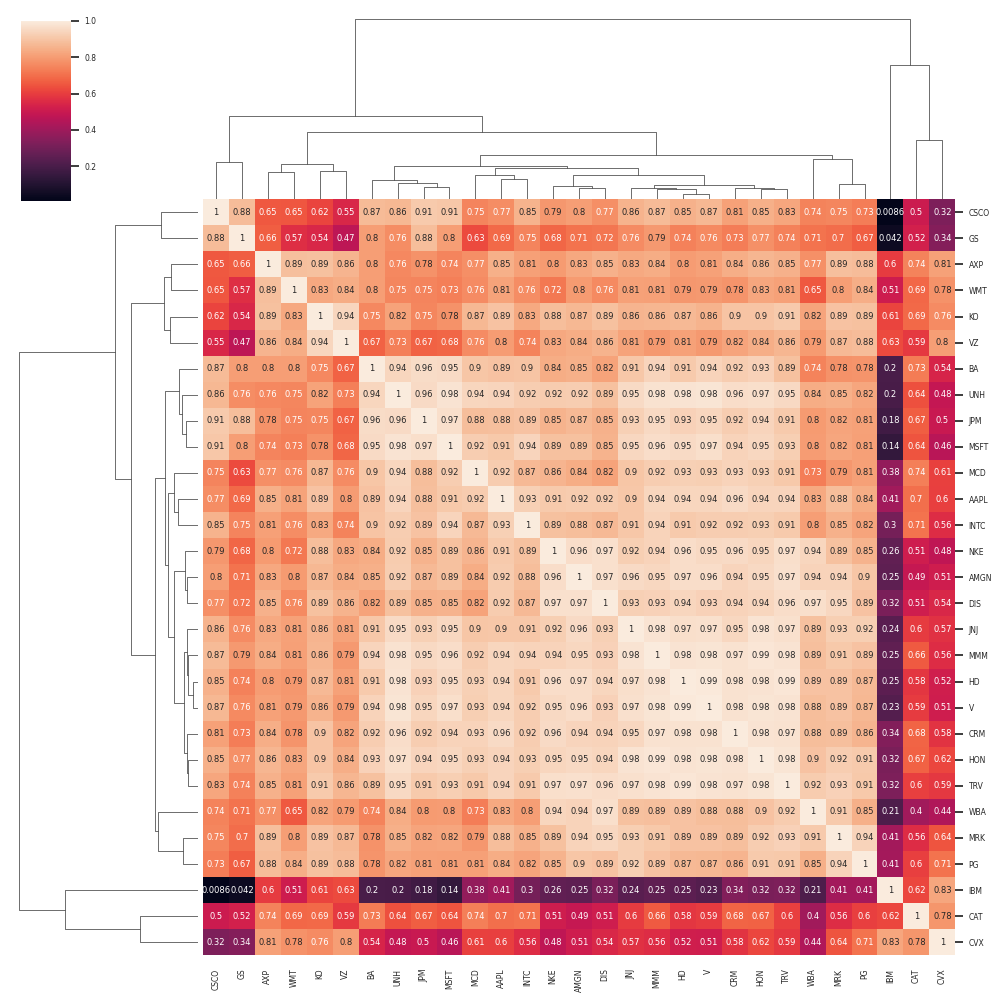

In [ ]:
cols2 = ['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS',
       'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
       'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']
cm2 = np.corrcoef(Data_frame[cols2].values.T)
sns.set(font_scale=0.5)
sns.clustermap(cm2, cbar=True, annot=True,yticklabels=cols2,xticklabels=cols2)

In [ ]:
Stock1 = ["CSCO", "GS"]
corr_Stock1 = ["CSCO", "GS",'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil',
       'EFFR',"TEDSpread", "Volume", "DJIA"]

Stock2 = ["AXP", "WMT", "KO", "VZ"]
corr_Stock2 = ["AXP", "WMT", "KO", "VZ", 'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil',
       'EFFR',"TEDSpread", "Volume", "DJIA"]

Stock3 = ["BA", "UNH", "JPM", "MSFT"]
corr_Stock3 = ["BA", "UNH", "JPM", "MSFT",  'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil',
       'EFFR',"TEDSpread", "Volume", "DJIA"]

Stock4 = ["MCD", "AAPL", "INTC"]
corr_Stock4 = ["MCD", "AAPL", "INTC",  'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil',
       'EFFR',"TEDSpread", "Volume", "DJIA"]

Stock5 = ["NKE", "AMGN", "DIS"]
corr_Stock5 = ["NKE", "AMGN", "DIS",  'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil',
       'EFFR',"TEDSpread", "Volume", "DJIA"]

Stock6 =["JNJ", "MMM", "HD", "V"]
corr_Stock6 = ["JNJ", "MMM", "HD", "V",  'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil',
       'EFFR',"TEDSpread", "Volume", "DJIA"]

Stock7 = ["CRM", "HON", "TRV"]
corr_Stock7 = ["CRM", "HON", "TRV",  'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil',
       'EFFR',"TEDSpread", "Volume", "DJIA"]

Stock8 = ["WBA", "MRK", "PG"]
corr_Stock8 = ["WBA", "MRK", "PG",  'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil',
       'EFFR',"TEDSpread", "Volume", "DJIA"]

Stock9 = ["CAT", "CVX"]
corr_Stock9 = ["CAT", "CVX",  'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil',
       'EFFR',"TEDSpread", "Volume", "DJIA"]

Stock10 = ["IBM","DJIA" ]
corr_Stock10 = ["IBM",  'InterestRate', 'ExchangeRate', 'VIX', 'Gold', 'Oil',
       'EFFR',"TEDSpread", "Volume", "DJIA"]

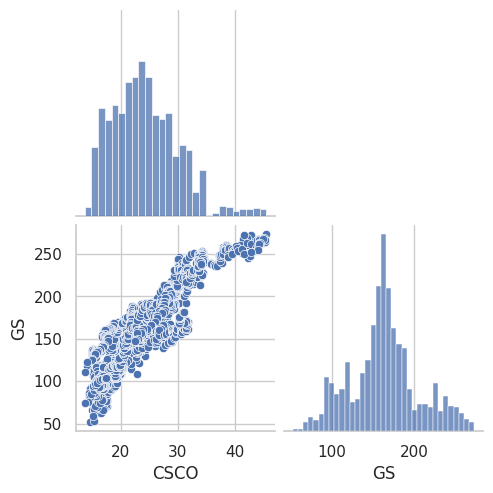

In [ ]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(Data_frame[Stock1], height=2.5, corner=True)
plt.show()

<Axes: >

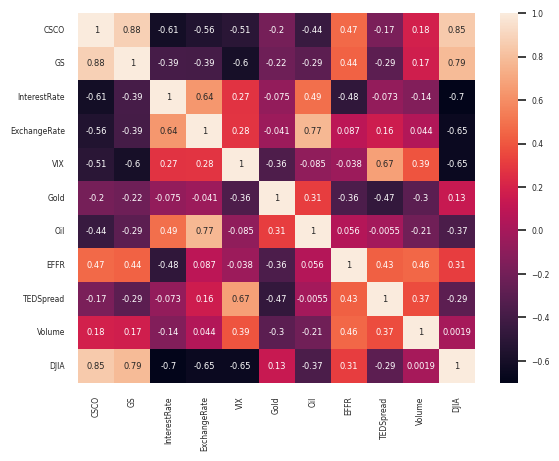

In [ ]:
cms1 = np.corrcoef(Data_frame[corr_Stock1].values.T)
sns.set(font_scale=0.5)
sns.heatmap(cms1, cbar=True, annot=True,yticklabels=corr_Stock1,xticklabels=corr_Stock1)

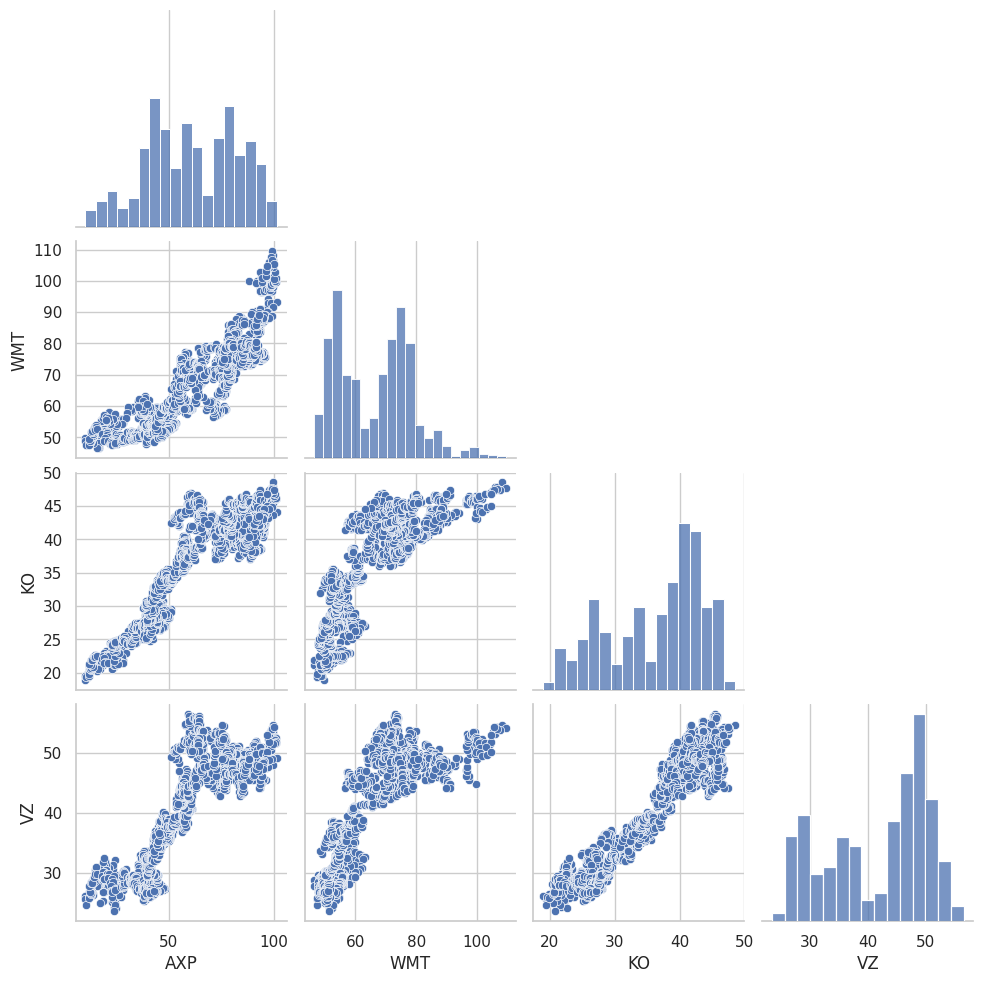

In [ ]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(Data_frame[Stock2], height=2.5, corner=True)
plt.show()

<Axes: >

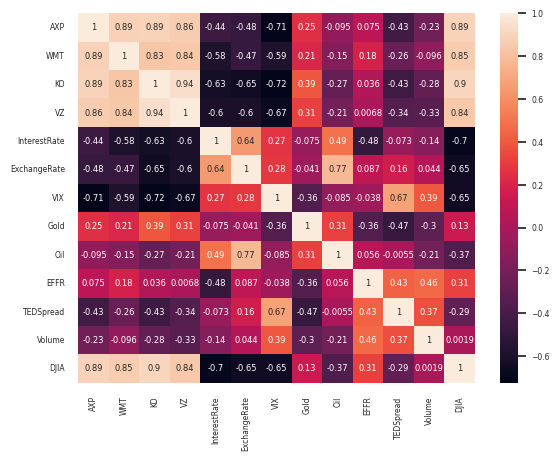

In [ ]:
cms2 = np.corrcoef(Data_frame[corr_Stock2].values.T)
sns.set(font_scale=0.5)
sns.heatmap(cms2, cbar=True, annot=True,yticklabels=corr_Stock2,xticklabels=corr_Stock2)

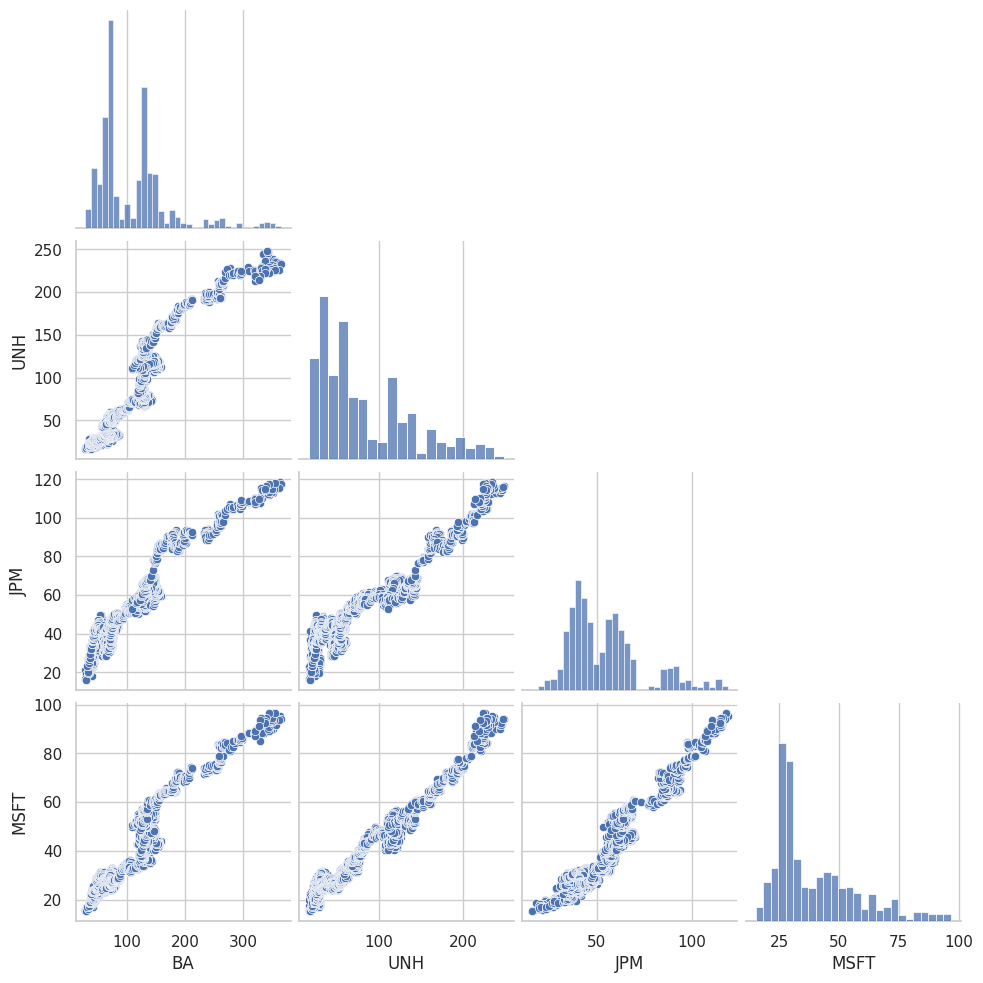

In [ ]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(Data_frame[Stock3], height=2.5, corner=True)
plt.show()

<Axes: >

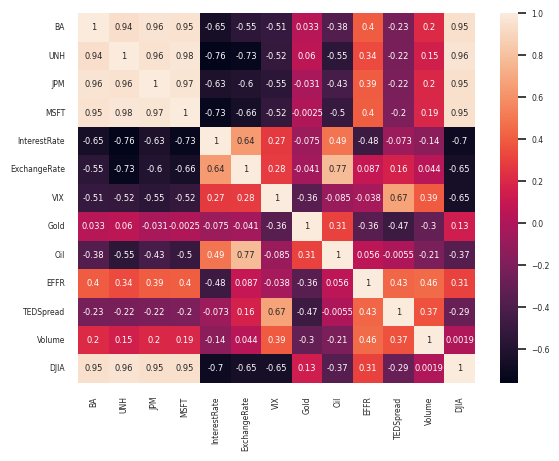

In [ ]:
cms3 = np.corrcoef(Data_frame[corr_Stock3].values.T)
sns.set(font_scale=0.5)
sns.heatmap(cms3, cbar=True, annot=True,yticklabels=corr_Stock3,xticklabels=corr_Stock3)

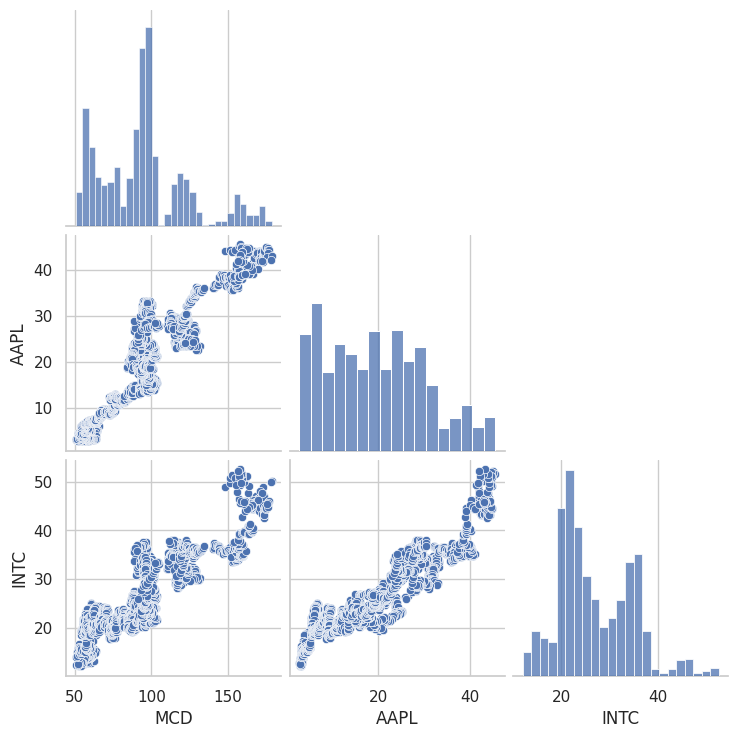

In [ ]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(Data_frame[Stock4], height=2.5, corner=True)
plt.show()

<Axes: >

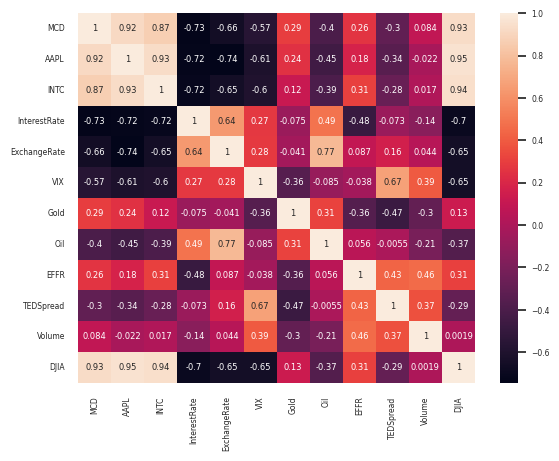

In [ ]:
cms4 = np.corrcoef(Data_frame[corr_Stock4].values.T)
sns.set(font_scale=0.5)
sns.heatmap(cms4, cbar=True, annot=True,yticklabels=corr_Stock4,xticklabels=corr_Stock4)

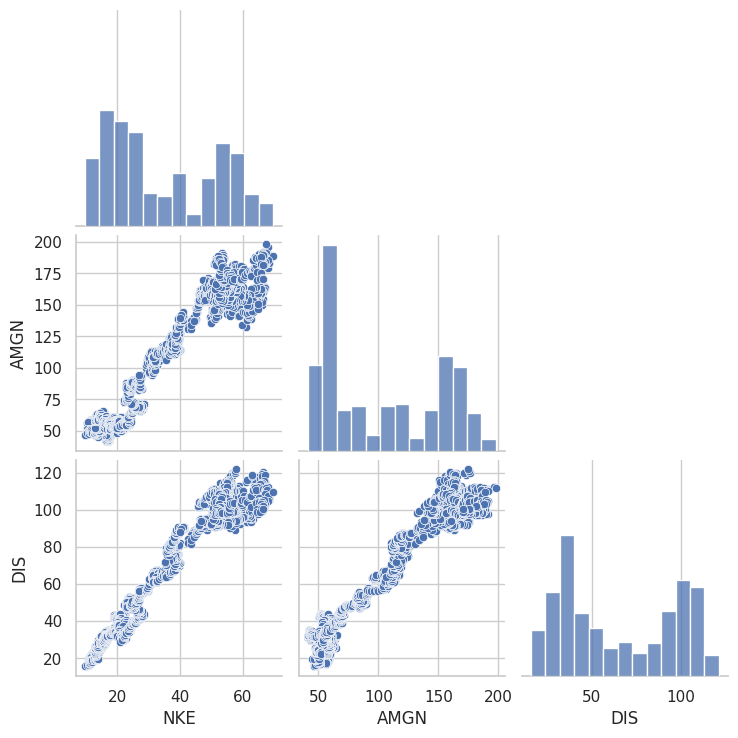

In [ ]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(Data_frame[Stock5], height=2.5, corner=True)
plt.show()

<Axes: >

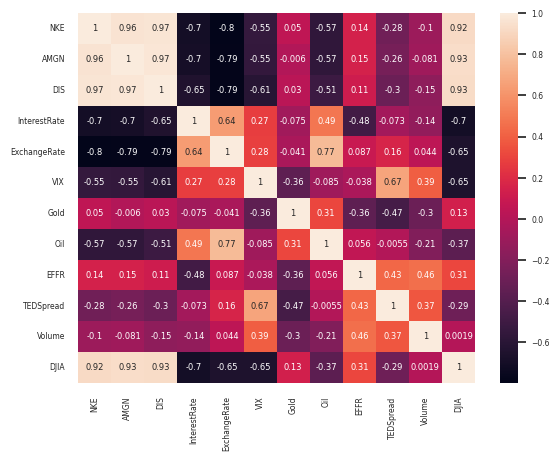

In [ ]:
cms5 = np.corrcoef(Data_frame[corr_Stock5].values.T)
sns.set(font_scale=0.5)
sns.heatmap(cms5, cbar=True, annot=True,yticklabels=corr_Stock5,xticklabels=corr_Stock5)

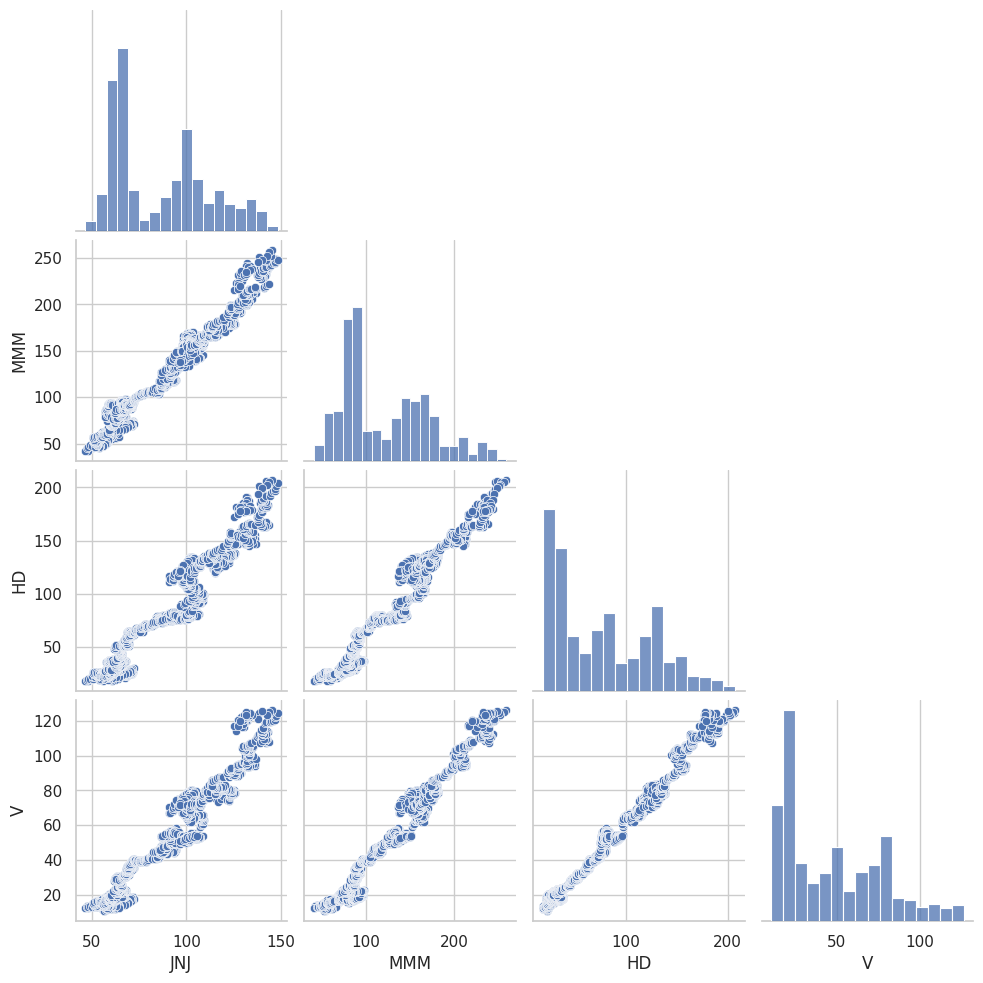

In [ ]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(Data_frame[Stock6], height=2.5, corner=True)
plt.show()

<Axes: >

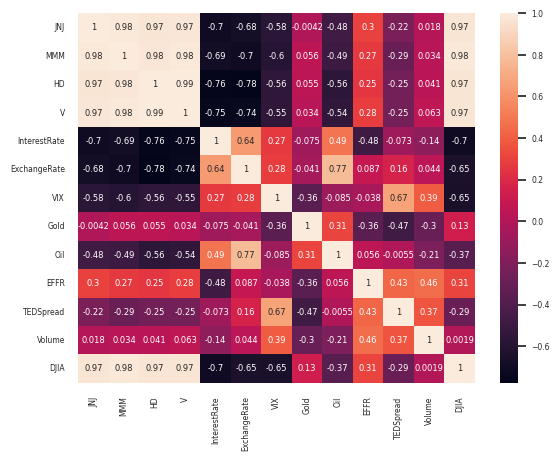

In [ ]:
cms6 = np.corrcoef(Data_frame[corr_Stock6].values.T)
sns.set(font_scale=0.5)
sns.heatmap(cms6, cbar=True, annot=True,yticklabels=corr_Stock6,xticklabels=corr_Stock6)

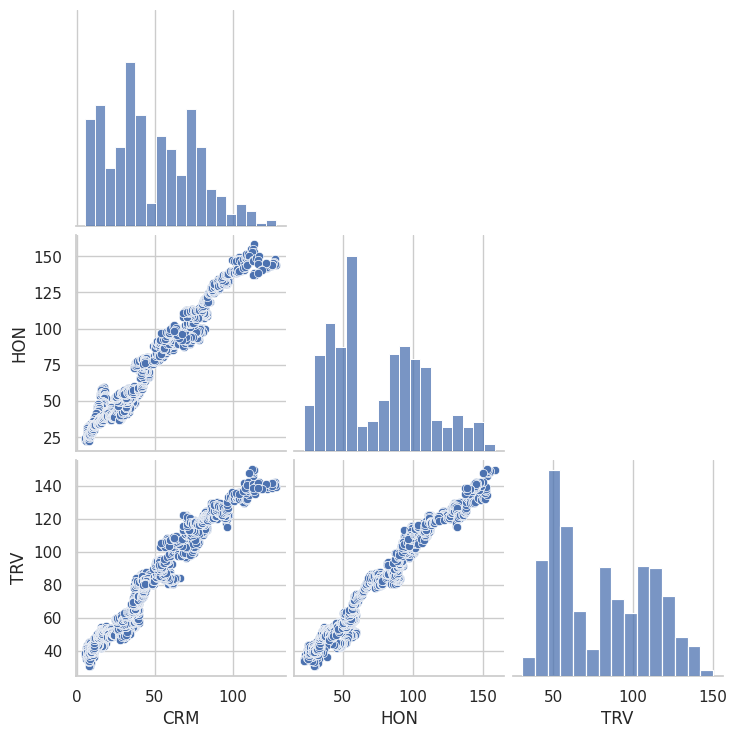

In [ ]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(Data_frame[Stock7], height=2.5, corner=True)
plt.show()

<Axes: >

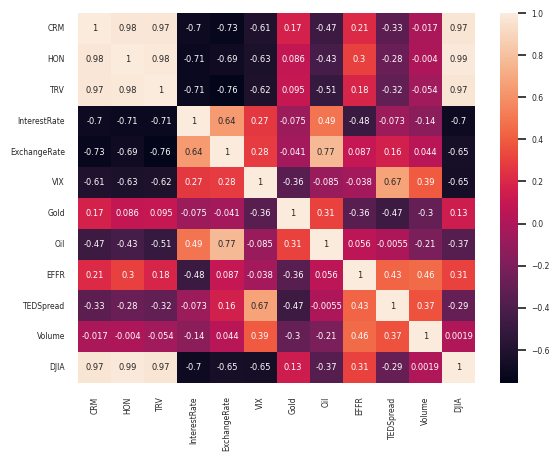

In [ ]:
cms7 = np.corrcoef(Data_frame[corr_Stock7].values.T)
sns.set(font_scale=0.5)
sns.heatmap(cms7, cbar=True, annot=True,yticklabels=corr_Stock7,xticklabels=corr_Stock7)

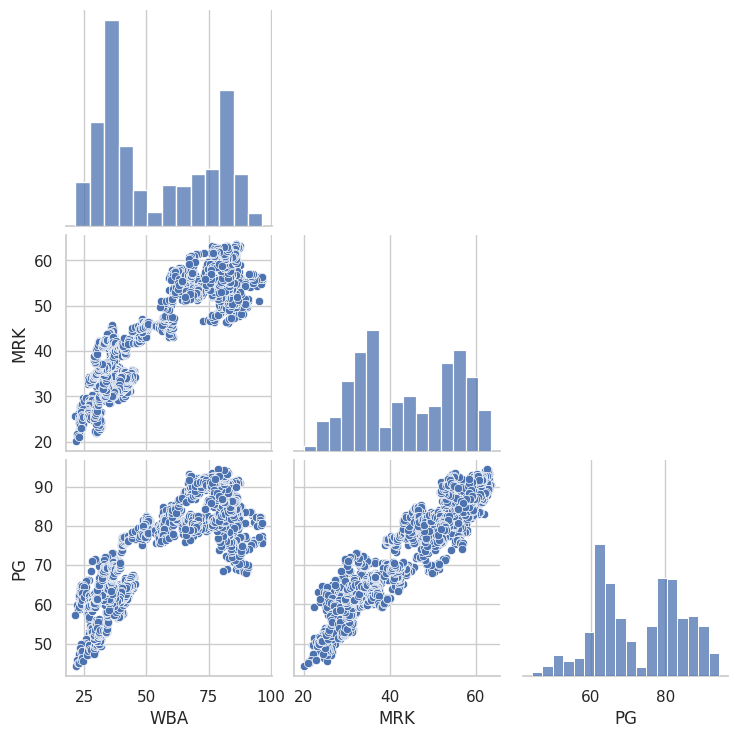

In [ ]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(Data_frame[Stock8], height=2.5, corner=True)
plt.show()

<Axes: >

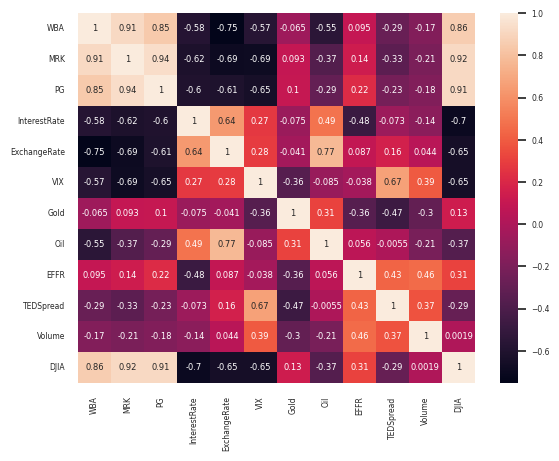

In [ ]:
cms8 = np.corrcoef(Data_frame[corr_Stock8].values.T)
sns.set(font_scale=0.5)
sns.heatmap(cms8, cbar=True, annot=True,yticklabels=corr_Stock8,xticklabels=corr_Stock8)

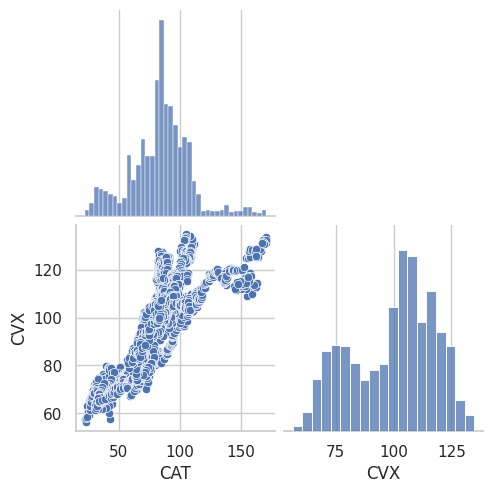

In [ ]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(Data_frame[Stock9], height=2.5, corner=True)
plt.show()

<Axes: >

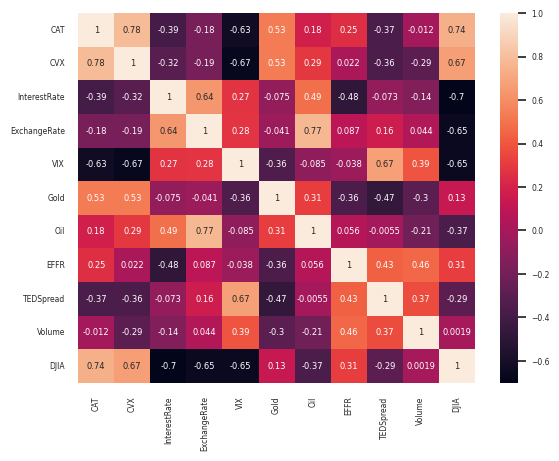

In [ ]:
cms9 = np.corrcoef(Data_frame[corr_Stock9].values.T)
sns.set(font_scale=0.5)
sns.heatmap(cms9, cbar=True, annot=True,yticklabels=corr_Stock9,xticklabels=corr_Stock9)

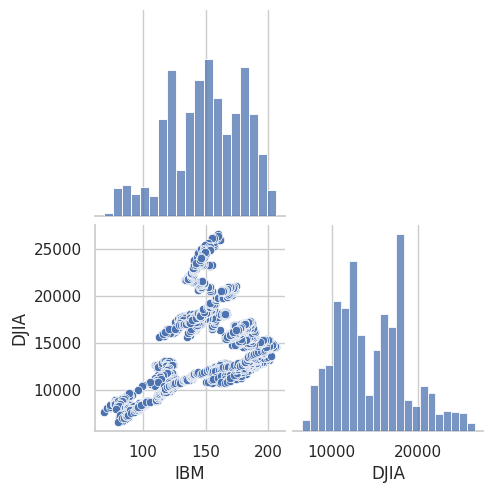

In [ ]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(Data_frame[Stock10], height=2.5, corner=True)
plt.show()

<Axes: >

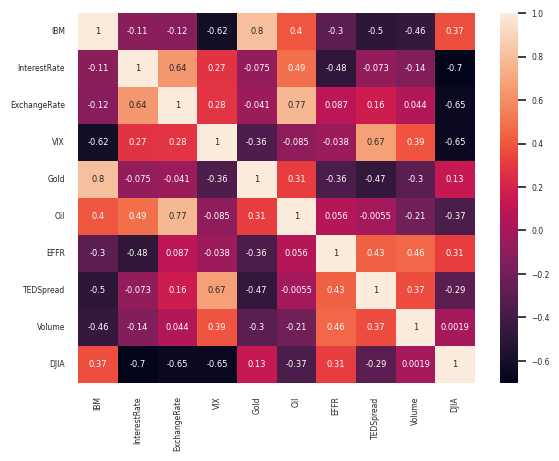

In [ ]:
cms10 = np.corrcoef(Data_frame[corr_Stock10].values.T)
sns.set(font_scale=0.5)
sns.heatmap(cms10, cbar=True, annot=True,yticklabels=corr_Stock10,xticklabels=corr_Stock10)

In [ ]:
model1 = 'IBM~ Gold + VIX + Volume + TEDSpread + Oil + EFFR + ExchangeRate + InterestRate'
lm    = sm.ols(formula = model1, data = Data_frame).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    IBM   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     2838.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:17:20   Log-Likelihood:                -9216.9
No. Observations:                2518   AIC:                         1.845e+04
Df Residuals:                    2509   BIC:                         1.850e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      188.1943      3.536     53.220   

In [41]:
model2 = 'HD~ExchangeRate + InterestRate + VIX + Oil + EFFR + Volume '
lm    = sm.ols(formula = model2, data = Data_frame).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     HD   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     2417.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:22:36   Log-Likelihood:                -10909.
No. Observations:                2518   AIC:                         2.183e+04
Df Residuals:                    2511   BIC:                         2.187e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      343.4982      5.384     63.801   

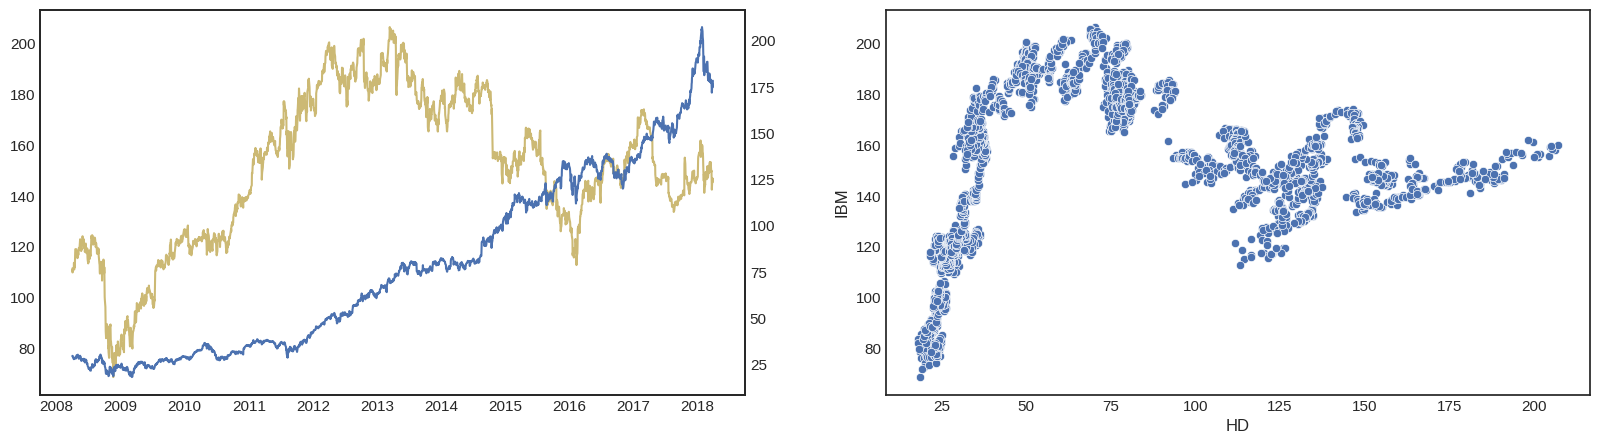

In [ ]:
plt.style.use('seaborn-v0_8-white')
fig, axes = plt.subplots(1, 2,figsize=(20, 5))
axes[0].plot(Data_frame.index, Data_frame["IBM"],"y" )

twin_axes = axes[0].twinx()
twin_axes.plot(Data_frame.index, Data_frame["HD"])

sns.scatterplot(data= Data_frame, x="HD", y="IBM", ax=axes[1])

f.tight_layout()

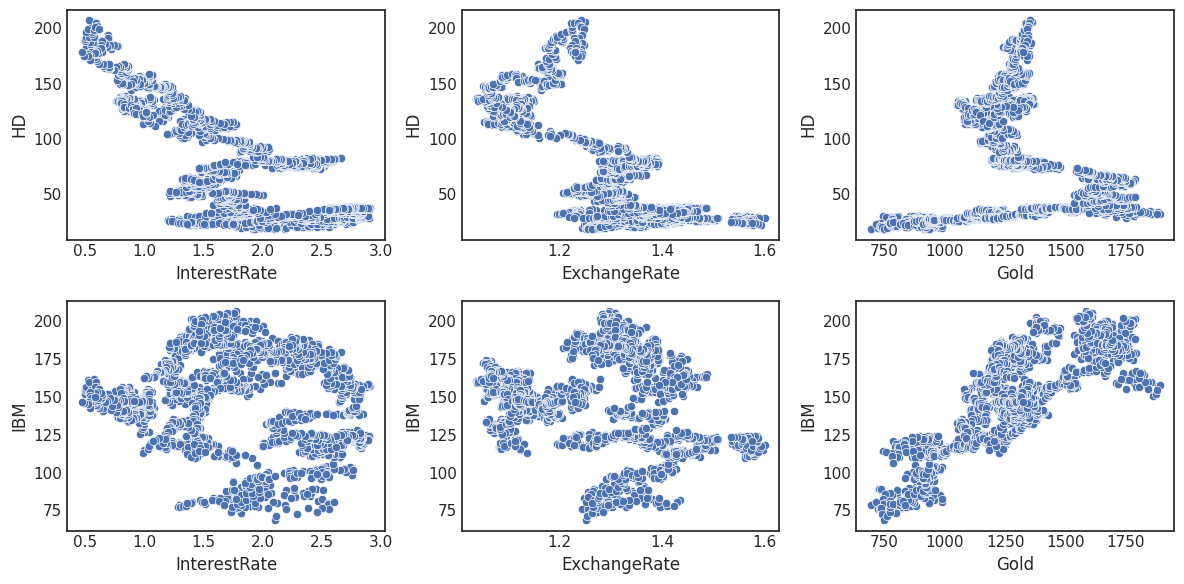

In [ ]:
f, axs = plt.subplots(2, 3, figsize=(12, 6))
sns.set(style="whitegrid", context="notebook")

sns.scatterplot(data= Data_frame, x="InterestRate", y="HD", ax=axs[0,0])

sns.scatterplot(data= Data_frame, x='ExchangeRate', y="HD", ax=axs[0,1])

sns.scatterplot(data= Data_frame, x='Gold', y="HD", ax=axs[0,2])

sns.scatterplot(data= Data_frame, x="InterestRate", y="IBM", ax=axs[1,0])

sns.scatterplot(data= Data_frame, x='ExchangeRate', y="IBM", ax=axs[1,1])

sns.scatterplot(data= Data_frame, x='Gold', y="IBM", ax=axs[1,2])

f.tight_layout()

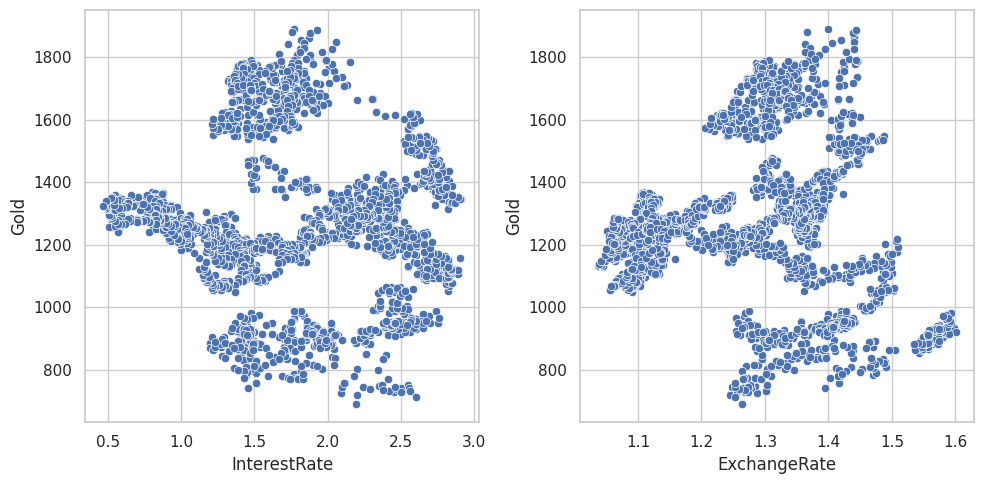

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.set(style="whitegrid", context="notebook")

sns.scatterplot(data= Data_frame, x="InterestRate", y="Gold", ax=axs[0])

sns.scatterplot(data= Data_frame, x="ExchangeRate", y="Gold", ax=axs[1])

f.tight_layout()